<a href="https://colab.research.google.com/github/Jorge-Mario-18/google-Colabs/blob/main/pass_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import json_normalize
import requests
import numpy as np

In [ ]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mplsoccer.pitch import Pitch

In [ ]:
competitions = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json')
competitions = competitions.json()

In [ ]:
competitions

In [ ]:
for competition in competitions:
  print(competition['competition_name'], competition['season_name'], competition['competition_id'], competition['season_id'])

In [ ]:
competition_id = 16
season_id = 21

In [ ]:
matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/'+str(competition_id)+'/'+str(season_id)+'.json')
matches = matches.json()

In [ ]:
matches
theteam = 'Inter Milan'

In [ ]:
for match in matches:
  if match['home_team']['home_team_name'] == theteam or match['away_team']['away_team_name'] == theteam:
    print(match['home_team']['home_team_name'], match['away_team']['away_team_name']+\
          " " + str(match['home_score']) + ":" +str(match['away_score']) +" (match_id is " +str(match['match_id']) + ")")

Bayern Munich Inter Milan 0:2 (match_id is 18235)


In [ ]:
match_id = 18235

In [ ]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/'+str(match_id)+'.json')

In [ ]:
events = events.json()
events

In [ ]:
events = json_normalize(events, sep = "_")


In [ ]:
pd.set_option("display.max.columns", None)

In [ ]:

inter = events.loc[events['possession_team_name'] == 'Inter Milan']
inter

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,off_camera,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,interception_outcome_id,interception_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,counterpress,pass_cross,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,ball_recovery_recovery_failure,clearance_aerial_won,pass_backheel,pass_cut_back,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_first_time,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,foul_won_defensive,shot_deflected,block_deflection,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_aerial_won,dribble_overrun,foul_committed_card_id,foul_committed_card_name,dribble_nutmeg,pass_goal_assist,pass_technique_id,pass_technique_name,pass_through_ball,shot_aerial_won,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,miscontrol_aerial_won,foul_committed_advantage,foul_won_advantage
4,35f637ef-4eb7-4627-a0b6-79ae71827240,5,1,00:00:00.628,0,0,2,0.4431,30,Pass,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[a9482430-64aa-4a72-b06e-29a57e1acdf4],True,"[61.0, 41.0]",4409.0,Wesley Sneijder,19.0,Center Attacking Midfield,19301.0,Esteban Matías Cambiasso Delau,13.416408,-2.677945,1.0,Ground Pass,"[49.0, 35.0]",40.0,Right Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,a9482430-64aa-4a72-b06e-29a57e1acdf4,6,1,00:00:01.071,0,1,2,NaN,42,Ball Receipt*,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[35f637ef-4eb7-4627-a0b6-79ae71827240],NaN,"[49.0, 35.0]",19301.0,Esteban Matías Cambiasso Delau,11.0,Left Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,767870ef-2dd4-4bbb-8270-5db90ea593b4,7,1,00:00:01.071,0,1,2,1.6633,30,Pass,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[f0a20460-b9fc-4f9d-9966-ef10351ac9f8],NaN,"[50.0, 35.0]",19301.0,Esteban Matías Cambiasso Delau,11.0,Left Defensive Midfield,19300.0,Lucimar da Silva Ferreira,30.413813,2.332943,1.0,Ground Pass,"[29.0, 57.0]",38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,f0a20460-b9fc-4f9d-9966-ef10351ac9f8,8,1,00:00:02.734,0,2,2,NaN,42,Ball Receipt*,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[767870ef-2dd4-4bbb-8270-5db90ea593b4],NaN,"[29.0, 57.0]",19300.0,Lucimar da Silva Ferreira,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
inter_pass_cord = inter.loc[(inter['type_name'] == 'Pass')]
inter_pass_cord

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,off_camera,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,interception_outcome_id,interception_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,counterpress,pass_cross,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,ball_recovery_recovery_failure,clearance_aerial_won,pass_backheel,pass_cut_back,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_first_time,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,foul_won_defensive,shot_deflected,block_deflection,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_aerial_won,dribble_overrun,foul_committed_card_id,foul_committed_card_name,dribble_nutmeg,pass_goal_assist,pass_technique_id,pass_technique_name,pass_through_ball,shot_aerial_won,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,miscontrol_aerial_won,foul_committed_advantage,foul_won_advantage
4,35f637ef-4eb7-4627-a0b6-79ae71827240,5,1,00:00:00.628,0,0,2,0.443100,30,Pass,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[a9482430-64aa-4a72-b06e-29a57e1acdf4],True,"[61.0, 41.0]",4409.0,Wesley Sneijder,19.0,Center Attacking Midfield,19301.0,Esteban Matías Cambiasso Delau,13.416408,-2.677945,1.0,Ground Pass,"[49.0, 35.0]",40.0,Right Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,767870ef-2dd4-4bbb-8270-5db90ea593b4,7,1,00:00:01.071,0,1,2,1.663300,30,Pass,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[f0a20460-b9fc-4f9d-9966-ef10351ac9f8],NaN,"[50.0, 35.0]",19301.0,Esteban Matías Cambiasso Delau,11.0,Left Defensive Midfield,19300.0,Lucimar da Silva Ferreira,30.413813,2.332943,1.0,Ground Pass,"[29.0, 57.0]",38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,852b814f-96ce-426c-87b7-6554bf6eb308,10,1,00:00:04.261,0,4,2,1.627314,30,Pass,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[8760afb2-be25-4aa3-9053-cbe36a84c9a9],NaN,"[26.0, 59.0]",19300.0,Lucimar da Silva Ferreira,3.0,Right Center Back,19299.0,Maicon Douglas Sisenando,20.808653,0.956133,1.0,Ground Pass,"[38.0, 76.0]",40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0cbb9ea0-40f9-4a1c-9ca7-379ae74e3d98,13,1,00:00:08.927,0,8,2,2.287100,30,Pass,238,Inter Milan,9,From Kick Off,238,Inter Milan,NaN,NaN,[8131d520-8c62-42fb-861a-f1333a065570],NaN,"[45.0, 75.0]",19299.0,Maicon Douglas Sisenando,2.0,Right Back,NaN,NaN,42.544094,-0.516231,3.0,High Pass,"[82.0, 54.0]",40.0,Right Foot,NaN,Na

In [ ]:
pass_merge = inter_pass_cord[['location', 'player_name', 'pass_recipient_name', 'pass_end_location']].apply(pd.Series).reset_index()
location_xy = inter_pass_cord[['location', 'player_name', 'period', 'pass_recipient_name', 'pass_end_location']].apply(pd.Series).reset_index()
location_x_y = pd.DataFrame(location_xy['location'].to_list(), columns = ['pos_x', 'pos_y'])
end_passes = pd.DataFrame(location_xy['pass_end_location'].to_list(), columns = ['end_pos_x', 'end_pos_y'])
location_xy['pos_x'] = location_x_y['pos_x']
location_xy['pos_y'] = location_x_y['pos_y']
location_xy['end_pos_x'] = end_passes['end_pos_x']
location_xy['end_pos_y'] = end_passes['end_pos_y']
location_xy['pass_recipient_name'] = pass_merge['pass_recipient_name']
location_xy = location_xy.drop(columns = ['location', 'index', ])
location_xy = location_xy[0:159]
location_xy


,player_name,period,pass_recipient_name,pass_end_location,pos_x,pos_y,end_pos_x,end_pos_y
0,Wesley Sneijder,1,Esteban Matías Cambiasso Delau,"[49.0, 35.0]",61.0,41.0,49.0,35.0
1,Esteban Matías Cambiasso Delau,1,Lucimar da Silva Ferreira,"[29.0, 57.0]",50.0,35.0,29.0,57.0
2,Lucimar da Silva Ferreira,1,Maicon Douglas Sisenando,"[38.0, 76.0]",26.0,59.0,38.0,76.0
3,Maicon Douglas Sisenando,1,NaN,"[82.0, 54.0]",45.0,75.0,82.0,54.0
4,Daniel Van Buyten,1,NaN,"[46.0, 6.0]",39.0,27.0,46.0,6.0
...,...,...,...,...,...,...,...,...
154,Esteban Matías Cambiasso Delau,1,Wesley Sneijder,"[58.0, 24.0]",31.0,33.0,58.0,24.0
155,Wesley Sneijder,1,Diego Alberto Milito,"[98.0, 21.0]",60.0,25.0,98.0,21.0
156,Diego Alberto Milito,1,Wesley Sneijder,"[108.0, 34.0]",101.0,21.0,108.0,34.0
157,"Samuel Eto""o Fils",1,Wesley Sneijder,"[46.0, 39.0]",47.0,50.0,46.0,39.0


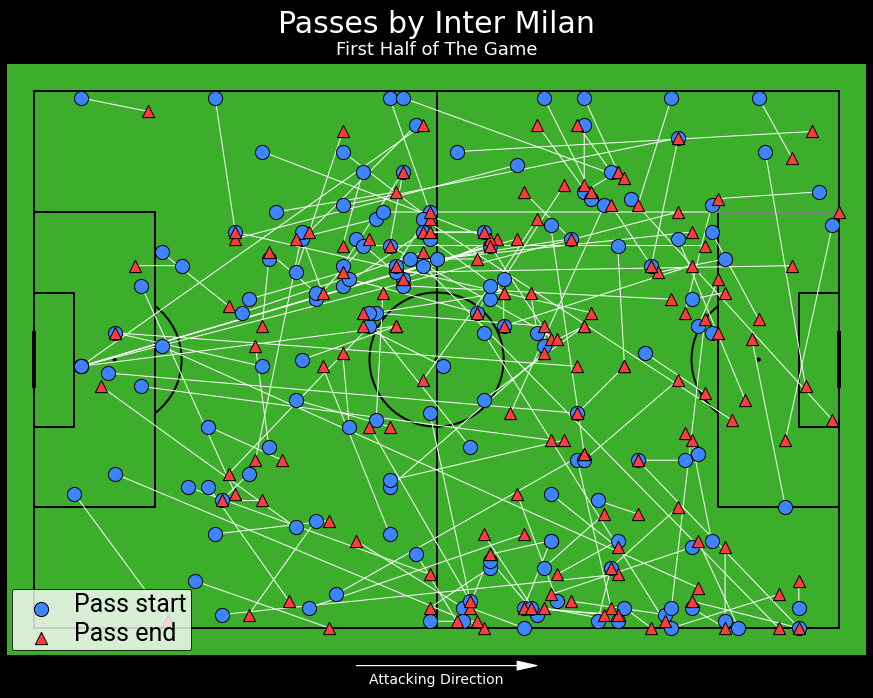

In [62]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, FontManager 
from matplotlib.colors import to_rgba
from matplotlib import rcParams


color = np.array(to_rgba('white'))
pitch = Pitch(pitch_type='statsbomb', pitch_color='#3dae2b', line_color='#000000')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor('#000000')

pass_lines = pitch.lines(location_xy.pos_x, location_xy.pos_y, location_xy.end_pos_x,  
                         location_xy.end_pos_y, lw = 1, color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(location_xy.pos_x, location_xy.pos_y, s=200,
                           color='#3C85FF', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'], label='Pass start')

pass_end_nodes = pitch.scatter(location_xy.end_pos_x, location_xy.end_pos_y, s=150,
                           color='#FF3C3C', edgecolors='black', linewidth=1, alpha=1, marker="^", ax=axs['pitch'], label='Pass end')


axs['title'].text(0.5, 0.7, 'Passes by Inter Milan', color='#FFFFFF',
                  va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'First Half of The Game', color='#FFFFFF',
                  va='center', ha='center', fontsize=18)

axs['endnote'].text(0.5, 0.3, 'Attacking Direction', va='center', ha='center', color='#FFFFFF', fontsize=14)
axs['endnote'].arrow(0.4, 0.7, 0.2, 0, head_width=0.25, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

robotto_regular = FontManager()
legend = axs['pitch'].legend(facecolor='#FFFFFF', handlelength=5, edgecolor='Black',
                             prop=robotto_regular.prop, loc='lower left')

for text in legend.get_texts():
    text.set_fontsize(25)